## ■ 첨도와, 왜도
### 왜도
- 왜도(비대칭도)란, 확률변수의 확률분포가 비대칭성을 가지고 있음을 뜻한다. 
- 영어로는 Skewness라고 하며 a=0이면 정규분포, a<0이면 오른쪽으로 치우침, a>0이면 왼쪽으로 치우침을 의미한다.

### 첨도
- 첨도란, 확률분포의 뾰족한 정도를 뜻한다. 
- 영어로는 Kurtosis라고 하며 a=3이면 정규분포, a<3이면 정규분포보다 완만함, a>3이면 정규분포 보다 뾰족함을 의미한다.


## ■ 네트워크의 두가지 유형
- 자연현상 중에, 우리 주변의 일상 중에(예: 키, 몸무게, 통계성적 등) 정규분포도 많고, 그에 못지않게 멱함수 분포(Power-law distribution)도 많이 있음.
- 특히 개체간 상호작용과 (긍정적/부정적) 피드백이 작용하는 관계에서는 멱함수 분포가 존재할 가능성이 일반적으로 높습니다. 

![네트워크의 두가지 유형](img/네트워크의두가지유형.jfif)

<hr>

## ■ 로그 변환, 제곱근 변환을 통한 정규분포화
- 분석 과정에서 Target Feature에 대한 EDA를 진행하다 보면 데이터의 분포가 정규분포가 아닌 경우가 많다.

- 로그 변환, 제곱급 변환은 이러한 특징들을 가진 변수를 정규분포에 가깝게 만들어 주기 위해 정규분포가 아니었던 분포를 정규분포로 변환시키는데 활용됨

- **Log를 취해주게 되면 큰 숫자를 같은 비율의 작은 숫자로 만들어주며, 첨도와 왜도가 줄어들면서 정규성이 높아진다.**

- 대부분의 통계 분석 방법이 정규성 가정을 기반으로 하므로 완벽하지 않더라도 최대한 정규분포로 변환하는 노력이 필요하다.

- **만약 변환 이후에도 정규 가정을 충족 못한다면, wilcox.test 등 비모수 검정 방법을 사용하는 것이 필요하다.**
- 예를 들어, 일반적인 로그 데이터와 같이 0(zero) 수치가 매우 많은 경우, 또는 극단적인 positive skewed 분포를 보이거나 분포의 편중이 심할 경우, **log, sqrt, box-cox 등의 방식으로 분포 변환이 가능**
- 위 방법 외에도 분포의 특성에 따라 제곱, 자연로그, 지수 등 다양한 함수가 사용될 수 있다.

![데이터변환2_정규분포화](img/데이터변환2_정규분포화.jpg)


In [1]:
import numpy as np
import pandas as pd

df_train = pd.read_csv('data/train.csv')
df_train.head(2) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [2]:
# 여객 운임료 Fare 에 대한 왜도, 첨도

print('왜도:', df_train['Fare'].skew()) # 왜도
print('첨도:', df_train['Fare'].kurt()) # 첨도

왜도: 4.787316519674893
첨도: 33.39814088089868


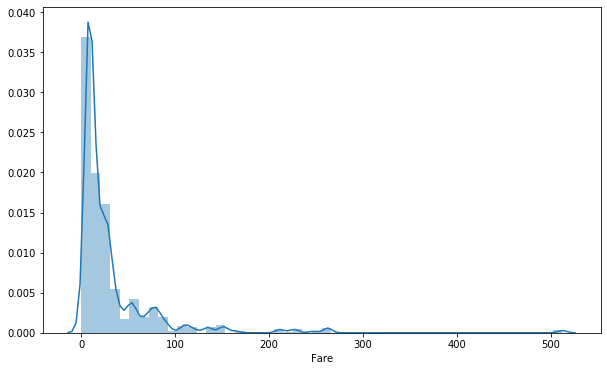

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(df_train["Fare"])

## 로그변환
- numpy.log1p 함수 사용

변환 후 : 왜도(Skewness): 0.395
변환 후 : 첨도(Kurtosis): 0.976


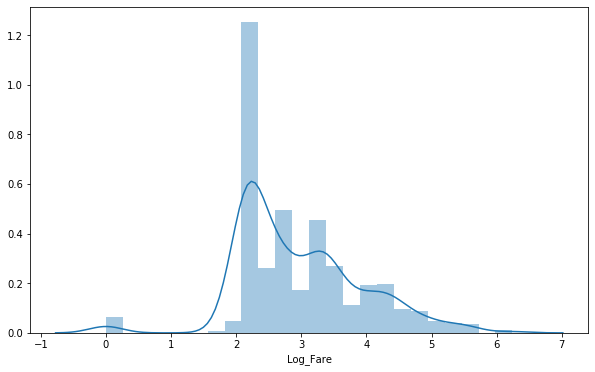

In [4]:
# 변환 후
df_train["Log_Fare"] = np.log1p(df_train["Fare"])
f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(df_train["Log_Fare"]) 

print("변환 후 : 왜도(Skewness): {:.3f}".format(df_train["Log_Fare"].skew()))
print("변환 후 : 첨도(Kurtosis): {:.3f}".format(df_train["Log_Fare"].kurt()))


- 왜도와 첨도가 많이 떨어졌고, plot 자체도 나름 정규 근사화가 된 것을 확인할 수 있음

### Box-Cox 변환
- Box-Cox 변환은 정규분포가 아닌 자료를 정규분포로 변환하기 위해 사용되며, 모수(parameter)  λ 를 가진다.
- 보통 여러가지  λ  값을 시도하여 가장 정규성을 높여주는 값을 찾아서 사용

![boxcox](img/boxcox.PNG)


- scipy.stats 의 boxcox 사용

(12657, 2)


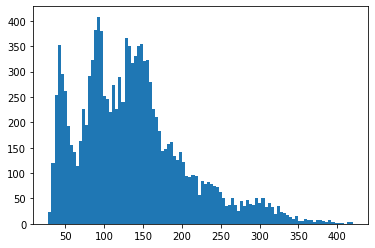

왜도 0.9009456173649683
첨도 0.7514593389614936


<Figure size 432x288 with 0 Axes>

In [10]:
from scipy import stats

# import the data as a pandas dataframe object
df = pd.read_csv('data/sample_data.csv')
print(df.shape)

# plot a 100 bin histogram of the "AIR_TIME" column
plt.hist(df['AIR_TIME'], bins=100)
plt.show()
plt.clf()

print('왜도', df['AIR_TIME'].skew())
print('첨도', df['AIR_TIME'].kurt())

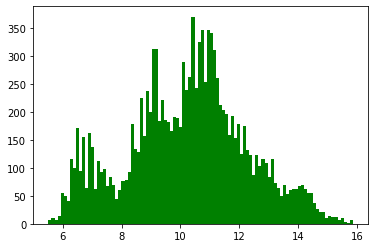

왜도 -0.02175320503670491
왜도 -0.38798734097114407


In [15]:
# get values from our "AIR_TIME" column
transform = np.asarray(df['AIR_TIME'].values)

# transform values and store as "dft"
dft = stats.boxcox(transform)[0]

# plot the transformed data
plt.hist(dft, bins=100, color='green')
plt.show()

print('왜도',pd.Series(dft).skew())
print('왜도',pd.Series(dft).kurt())